## Objective

Analyze year over year (YoY) change in spending in actual budget data in the last five (5) fiscal years (FY),FY 18-23, in administrative, instructional, and support services.

In [61]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
#importing acual budget data
fy18_actual = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 18 Actual Budget Data.csv")
fy19_actual = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 19 Actual Budget Data.csv")
fy20_actual = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 20 Actual Budget Data .csv")
fy21_actual = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 21 Actual Budget Data.csv")
fy22_actual = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 22 Actual Budget Data.csv")
fy23_actual = pd.read_csv(r"C:\Users\togarro\Documents\FY 25 Budget Analysis\FY 25 Budget Analysis - FY 23 Actual Budget Data.csv")

In [71]:
# Aggregated metrics for Actual budget data FY 18-23 
fy18_agg = fy18_actual.groupby(['FY','Category'])['Actuals'].sum().reset_index()

fy18_agg_df = pd.DataFrame(fy18_agg)

fy19_agg = fy19_actual.groupby(['FY','Category'])['Actuals'].sum().reset_index()

fy19_agg_df = pd.DataFrame(fy19_agg)

fy20_agg = fy20_actual.groupby(['FY','Category'])['Actuals'].sum().reset_index()

fy20_agg_df = pd.DataFrame(fy20_agg)

fy21_agg = fy21_actual.groupby(['FY','Category'])['Actuals'].sum().reset_index()

fy21_agg_df = pd.DataFrame(fy21_agg)

fy22_agg = fy22_actual.groupby(['FY','Category'])['Actuals'].sum().reset_index()

fy22_agg_df = pd.DataFrame(fy22_agg)

fy23_agg = fy23_actual.groupby(['FY','Category'])['Actuals'].sum().reset_index()

fy23_agg_df = pd.DataFrame(fy23_agg)

#Concating all dataframes into a single dataframe
actual_budget_data = pd.concat([fy18_agg_df,fy19_agg_df,fy20_agg_df,fy21_agg_df,fy22_agg_df,fy23_agg_df])

In [72]:
#subsetting dataframe into three distinct categories
actual_administrative_df = actual_budget_data[actual_budget_data['Category'] == 'Administrative']
actual_instruction_df = actual_budget_data[actual_budget_data['Category'] == 'Instruction']
actual_sup_ser_df = actual_budget_data[actual_budget_data['Category'] == 'Support Services']

#creating variables to calculate YoY actual metrics from the previous years
previous_year_administrative =  actual_administrative_df['Actuals'].shift(1)
previous_year_instruction = actual_instruction_df['Actuals'].shift(1)
previous_year_sup = actual_sup_ser_df['Actuals'].shift(1)

#Creating column 'YoY' in the subsetted dataframes 
actual_administrative_df['YoY Change'] = actual_administrative_df['Actuals'] - previous_year_administrative
actual_instruction_df['YoY Change'] = actual_instruction_df['Actuals'] - previous_year_instruction
actual_sup_ser_df['YoY Change'] = actual_sup_ser_df['Actuals'] - previous_year_sup

#Replacing missing values in 'YoY Change' with 0
actual_administrative_df['YoY Change'] = actual_administrative_df['YoY Change'].fillna(0)
actual_instruction_df['YoY Change'] = actual_instruction_df['YoY Change'].fillna(0)
actual_sup_ser_df['YoY Change'] = actual_sup_ser_df['YoY Change'].fillna(0)

#Creating columns YoY Change Pct
actual_administrative_df['YoY Change Pct']  = round(actual_administrative_df['YoY Change']/previous_year_administrative,2)
actual_instruction_df['YoY Change Pct'] = round(actual_instruction_df['YoY Change']/previous_year_instruction,2)
actual_sup_ser_df['YoY Change Pct']= round(actual_sup_ser_df['YoY Change']/previous_year_sup,2)

#Replacing missing values in 'YoY Change Pct' with 0
actual_administrative_df['YoY Change Pct'] = actual_administrative_df['YoY Change Pct'].fillna(0)
actual_instruction_df['YoY Change Pct'] = actual_instruction_df['YoY Change Pct'].fillna(0)
actual_sup_ser_df['YoY Change Pct'] = actual_sup_ser_df['YoY Change Pct'].fillna(0)

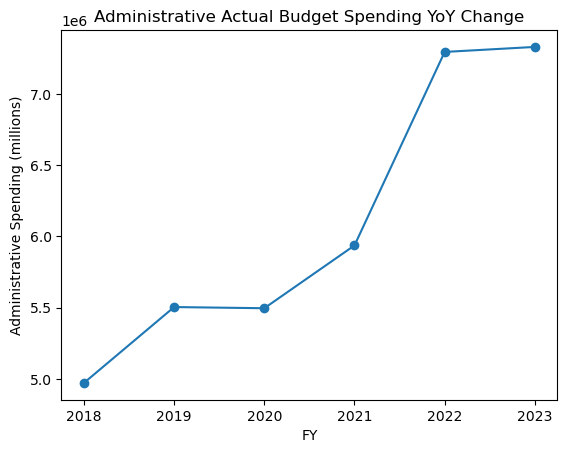

In [66]:
#Actuals Administrative Visualization
plt.plot( actual_administrative_df['FY'] ,actual_administrative_df['Actuals'],marker = 'o',)
plt.ylabel('Administrative Spending (millions)')
plt.xlabel('FY')
plt.title('Administrative Actual Budget Spending YoY Change')
plt.show()

In [68]:
actual_administrative_df[['YoY Change','YoY Change Pct']].mean()

YoY Change        393246.96
YoY Change Pct         0.07
dtype: float64

### Administrative Actual Budget Spending 

On average there is an 393246.96, 7%, increase YoY in administrative spending. The largest increase in administrative spending was from FY 21 to FY 22, a 1358722.18, 23%, increase in YoY spending.

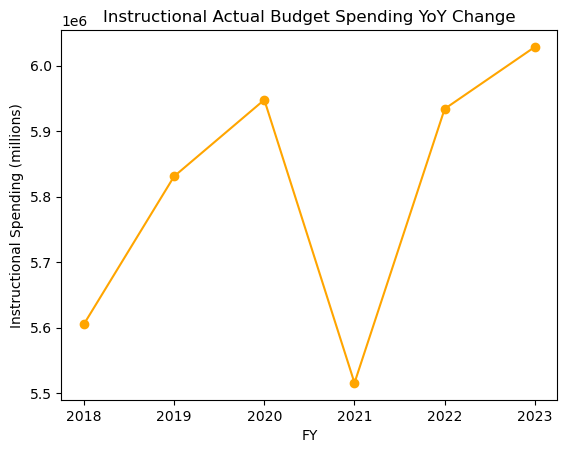

In [67]:
#Actuals Instructional Visualization
plt.plot( actual_instruction_df['FY'] ,actual_instruction_df['Actuals'],marker = 'o',color = 'orange')
plt.ylabel('Instructional Spending (millions)')
plt.xlabel('FY')
plt.title('Instructional Actual Budget Spending YoY Change')
plt.show()

In [13]:
actual_instruction_df[['YoY Change','YoY Change Pct']].mean()

YoY Change        70459.485
YoY Change Pct        0.015
dtype: float64

### Instructional Actual Budget Spending 

On average there is an increase of approximatey 70459.49, 2%, in YoY on instructional spending.The largest increase in instructional spending was from FY 21 to FY 22, an increase of 417992.88, 8%, YoY spending 	

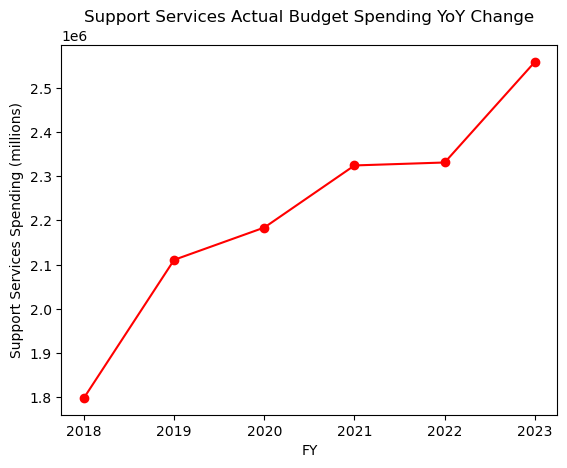

In [69]:
#Actuals Support Services Visualization
plt.plot( actual_sup_ser_df['FY1'] ,actual_sup_ser_df['Actuals'],marker = 'o',color = 'red')
plt.ylabel('Support Services Spending (millions)')
plt.xlabel('FY')
plt.title('Support Services Actual Budget Spending YoY Change')
plt.show()

In [70]:
actual_sup_ser_df[['YoY Change','YoY Change Pct']].mean()

YoY Change        126614.548333
YoY Change Pct         0.060000
dtype: float64

### Support Services Actual Budget Spending 

On average, there is an increase of approximately 126614.55, 6%, in YoY spending on support services. The largest increase in support services spending was from the FY 22 to FY 23, an increase of 227386.30, 10%, YoY spending.